In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import torch
import numpy as np
import seaborn as sns

In [76]:
reweighted_samples_path = '/data/rradev/generator_reweight/reweighted_samples/'
col_names =  ["isNu", "isNue", "isNumu", "isNutau", "cc", "Enu_true", "ELep", "CosLep", "Q2", "W", "x", "y", "nP", "nN", "nipip", "nipim", "nipi0", "niem", "eP", "eN", "ePip", "ePim", "ePi0"]

def load_feats_probas():
    genie_feats = torch.load(reweighted_samples_path + 'GENIEv2_test_features.pt')
    genie_probas = torch.load(reweighted_samples_path + 'GENIEv2_test_probas.pt').detach()
    genie = pd.DataFrame(genie_feats, columns=col_names)
    genie['probas'] = genie_probas

    neut_feats = torch.load(reweighted_samples_path + 'NEUT_test_features.pt')
    neut_probas = torch.load(reweighted_samples_path + 'NEUT_test_probas.pt').detach()
    neut = pd.DataFrame(neut_feats, columns=col_names)
    neut['probas'] = neut_probas
    return neut, genie

neut, genie = load_feats_probas()
neut = neut[neut['ELep'] > 0] #only charged current interactions
neut_probas = neut['probas'][neut['ELep'] > 0]
neut_reweighted = neut.mul(neut['probas'], axis='index')

# Make Some Plots

(0.0, 500.0)

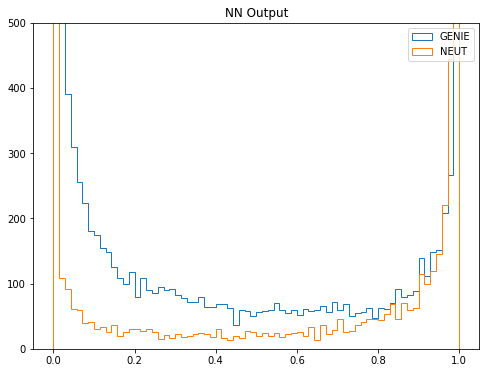

In [77]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.hist(genie['probas'], bins=70, histtype="step", label='GENIE')
plt.hist(neut['probas'], bins=70, histtype="step", label='NEUT')
plt.legend()
plt.title('NN Output')
plt.ylim(0, 500)

In [116]:
neut_predicitons = [1 if proba > 0.5 else 0 for proba in neut['probas']]
np.sum(neut_predicitons)/len(neut_predicitons)

0.8073762277009421

In [117]:
genie_predictions = [1 if proba < 0.5 else 0 for proba in genie['probas']]
np.sum(genie_predictions)/len(genie_predictions)

0.5814

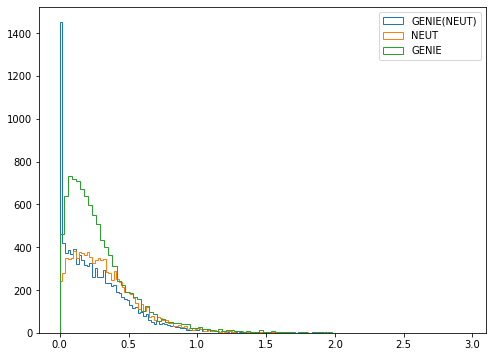

In [78]:
def plot_variable(variable):
    plt.hist(neut_reweighted[variable], bins=100, label='GENIE(NEUT)', histtype='step',);
    plt.hist(neut[variable], bins=100, label='NEUT', histtype='step')
    plt.hist(genie[variable], bins=100, label='GENIE', histtype='step')
    plt.legend()

variable = 'x' 
plot_variable(variable)

In [79]:
neut[neut['cc'] == 0]

,isNu,isNue,isNumu,isNutau,cc,Enu_true,ELep,CosLep,Q2,W,...,nipip,nipim,nipi0,niem,eP,eN,ePip,ePim,ePi0,probas
2,1.0,1.0,0.0,0.0,0.0,44.033806,36.898781,0.997784,7.202397,2.658410,...,1.0,1.0,1.0,0.0,0.737374,0.381319,0.548588,2.940048,2.105249,0.998111
5,1.0,1.0,0.0,0.0,0.0,16.063305,13.483300,0.999597,0.174561,2.355268,...,1.0,1.0,0.0,0.0,0.052496,0.165814,0.062342,2.039179,0.000000,0.999798
8,1.0,1.0,0.0,0.0,0.0,20.790876,14.269891,0.994548,3.235195,3.143577,...,2.0,2.0,1.0,0.0,0.000000,2.268752,2.637325,0.888498,0.053073,0.999697
9,1.0,1.0,0.0,0.0,0.0,35.751133,23.448002,0.996036,6.646723,4.161850,...,2.0,1.0,2.0,0.0,0.000000,9.440070,1.441488,0.215806,0.478960,0.000042
16,1.0,1.0,0.0,0.0,0.0,47.340103,33.450600,0.996114,12.306157,3.826024,...,2.0,2.0,1.0,0.0,0.000000,2.216844,4.544314,1.622966,4.821211,0.999376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,1.0,1.0,0.0,0.0,0.0,43.058254,20.412838,0.997821,3.830701,6.288464,...,2.0,2.0,0.0,0.0,0.000000,0.196688,5.281088,16.630144,0.000000,1.000000
9988,1.0,1.0,0.0,0.0,0.0,30.541231,25.820940,0.997774,3.510314,2.495571,...,0.0,1.0,2.0,0.0,0.268321,0.043131,0.000000,3.053265,0.868950,1.000000
9989,1.0,1.0,0.0,0.0,0.0,13.481216,3.032085,0.904279,7.825451,3.558534,...,0.0,1.0,2.0,0.0,1.563961,0.029819,0.000000,1.069972,7.387674,0.995930
9992,1.0,0.0,1.0,0.0,0.0,44.935028,11.958218,0.990318,10.405519,7.235833,...,4.0,5.0,6.0,0.0,1.303853,1.530373,12.843102,1.051874,13.147961,0.999626


<AxesSubplot:xlabel='nN', ylabel='Count'>

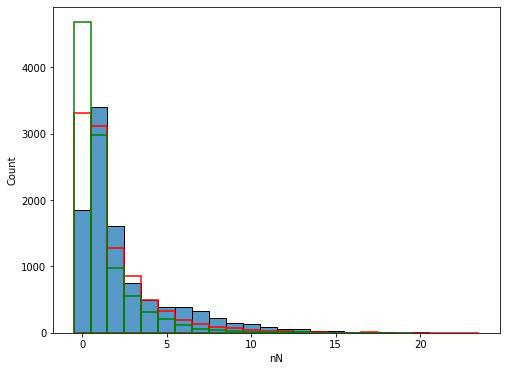

In [107]:
genie['generator'] = 'GENIE'
neut['generator'] = 'Reweighted'
neut_reweighted['generator'] = 'NEUT'
all_dfs = pd.concat([genie, neut, neut_reweighted], ignore_index=True)
sns.histplot(genie['nN'], discrete=True)
sns.histplot(neut['nN'], discrete=True, color='red', fill=False)
sns.histplot(neut_reweighted['nN'], discrete=True, color='green', fill=False)